In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from tqdm import tqdm

In [2]:
# Input Dataset 

DM = pd.read_csv("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019-UDPLag\\UDPLag.csv") #DM--> Dataset Malware

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_21052\67309532.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  DM = pd.read_csv("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-DDoS2019-UDPLag\\UDPLag.csv") #DM--> Dataset Malware


In [3]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370605 entries, 0 to 370604
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    370605 non-null  int64  
 1   Flow ID                       370605 non-null  object 
 2    Source IP                    370605 non-null  object 
 3    Source Port                  370605 non-null  int64  
 4    Destination IP               370605 non-null  object 
 5    Destination Port             370605 non-null  int64  
 6    Protocol                     370605 non-null  int64  
 7    Timestamp                    370605 non-null  object 
 8    Flow Duration                370605 non-null  int64  
 9    Total Fwd Packets            370605 non-null  int64  
 10   Total Backward Packets       370605 non-null  int64  
 11  Total Length of Fwd Packets   370605 non-null  int64  
 12   Total Length of Bwd Packets  370605 non-nul

In [4]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM[' Label'] == "BENIGN"]
MalwareData = DM[DM[' Label'] == "UDP-lag"]

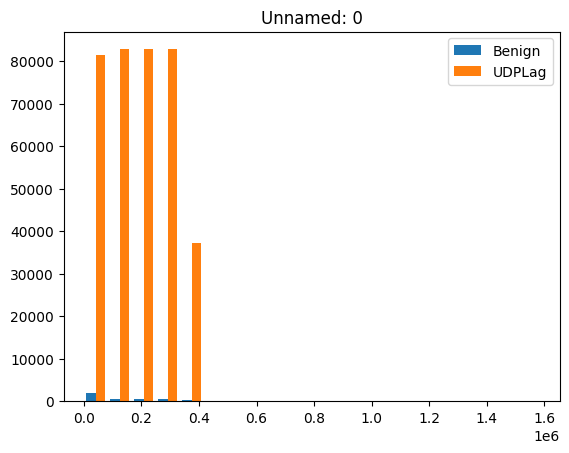

In [5]:
# Histogram penyebaran data benign dan malware pada fitur Unnamed: 0.
x = BenignData["Unnamed: 0"]
y = MalwareData["Unnamed: 0"]
bins = np.linspace(0, 1582681, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Unnamed: 0")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

In [6]:
# Histogram penyebaran data benign dan malware pada fitur Flow ID.
x = BenignData["Flow ID"]
y = MalwareData["Flow ID"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Flow ID")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

KeyboardInterrupt: 

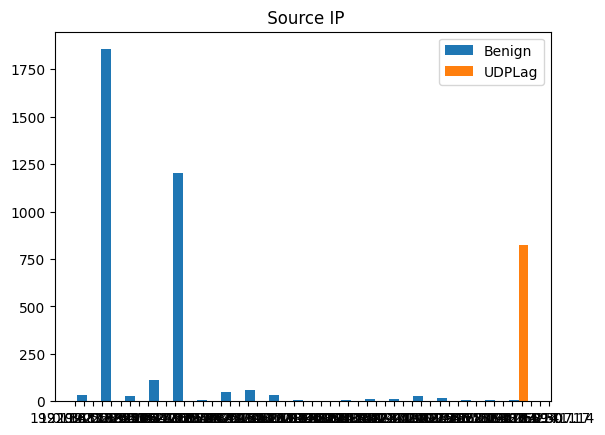

In [7]:
# Histogram penyebaran data benign dan malware pada fitur  Source IP.
x = BenignData[" Source IP"]
y = MalwareData[" Source IP"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Source IP")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

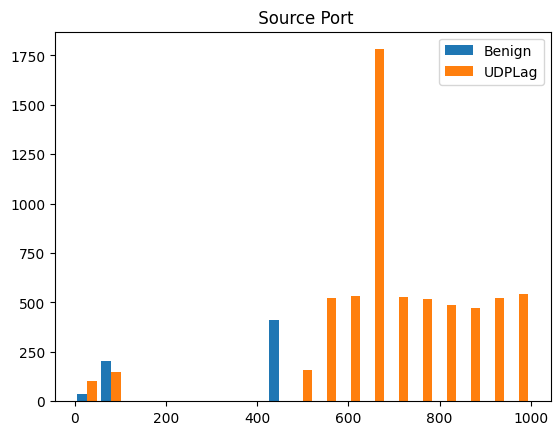

In [8]:
# Histogram penyebaran data benign dan malware pada fitur  Source Port.
x = BenignData[" Source Port"]
y = MalwareData[" Source Port"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Source Port")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

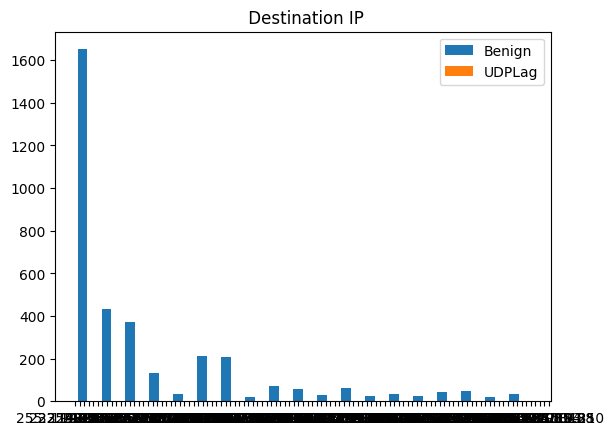

In [9]:
# Histogram penyebaran data benign dan malware pada fitur Destination IP.
x = BenignData[" Destination IP"]
y = MalwareData[" Destination IP"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Destination IP")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

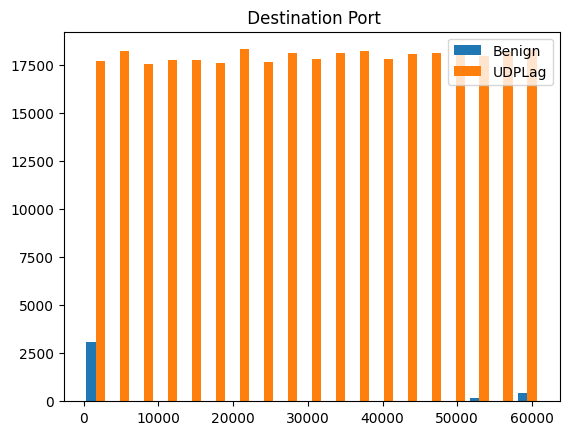

In [10]:
# Histogram penyebaran data benign dan malware pada fitur  Destination Port.
x = BenignData[" Destination Port"]
y = MalwareData[" Destination Port"]
bins = np.linspace(0, 61000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 61000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Destination Port")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

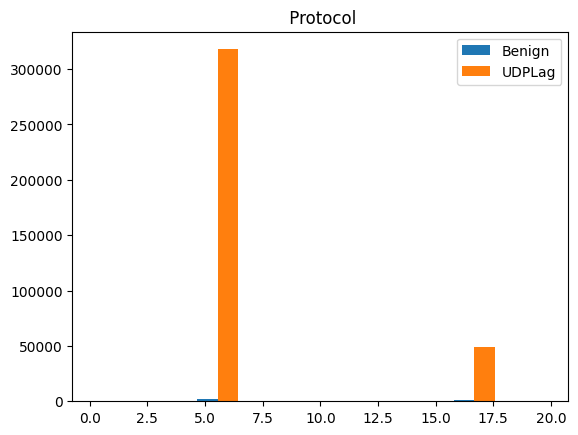

In [11]:
# Histogram penyebaran data benign dan malware pada fitur Protocol.
x = BenignData[" Protocol"]
y = MalwareData[" Protocol"]
bins = np.linspace(0, 20, 10) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Protocol")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

In [12]:
# Histogram penyebaran data benign dan malware pada fitur Timestamp.
x = BenignData[" Timestamp"]
y = MalwareData[" Timestamp"]
bins = np.linspace(0, 20, 10) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Timestamp")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

KeyboardInterrupt: 

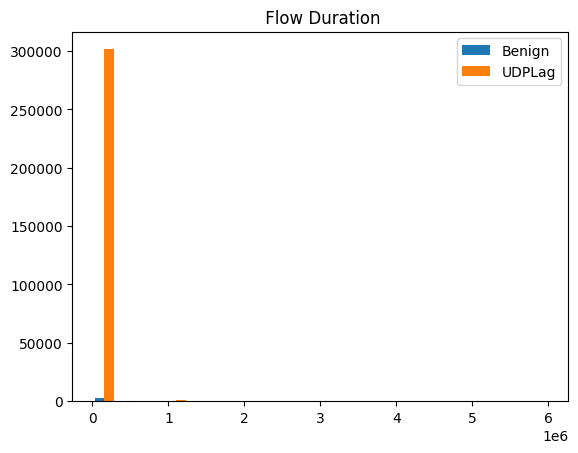

In [13]:
# Histogram penyebaran data benign dan malware pada fitur Flow Duration.
x = BenignData[" Flow Duration"]
y = MalwareData[" Flow Duration"]
bins = np.linspace(0, 6000000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 6000000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Flow Duration")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

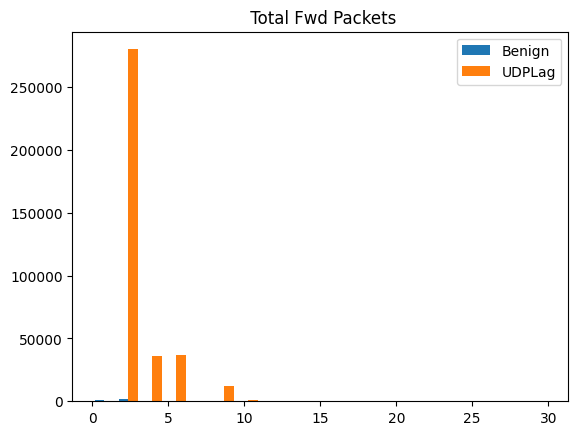

In [14]:
# Histogram penyebaran data benign dan malware pada fitur Total Fwd Packets.
x = BenignData[" Total Fwd Packets"]
y = MalwareData[" Total Fwd Packets"]
bins = np.linspace(0, 30, 20) # Berbeda karena mayoritas data bernilai 0 sampai 30, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Total Fwd Packets")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

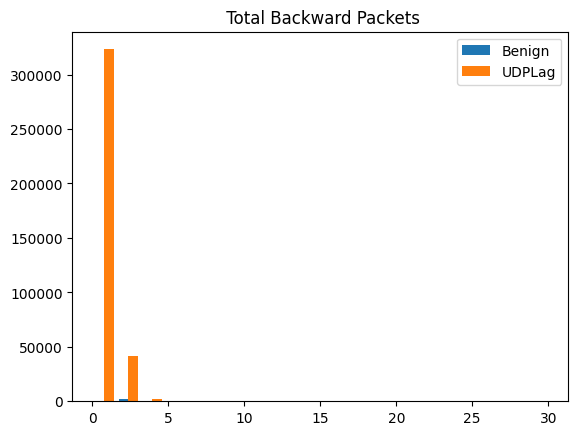

In [15]:
# Histogram penyebaran data benign dan malware pada fitur Total Backward Packets.
x = BenignData[" Total Backward Packets"]
y = MalwareData[" Total Backward Packets"]
bins = np.linspace(0, 30, 20) # Berbeda karena mayoritas data bernilai 0 sampai 30, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Total Backward Packets")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

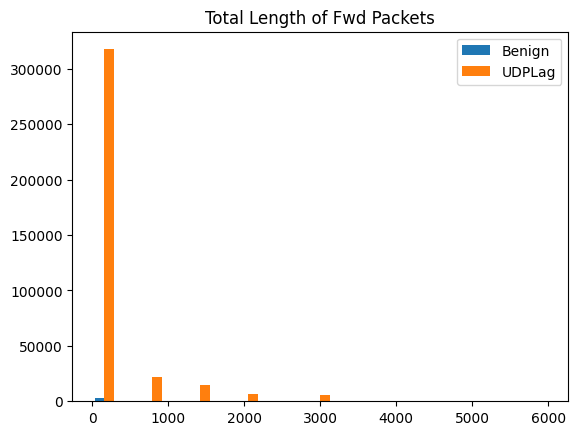

In [16]:
# Histogram penyebaran data benign dan malware pada fitur Total Length of Fwd Packets.
x = BenignData["Total Length of Fwd Packets"]
y = MalwareData["Total Length of Fwd Packets"]
bins = np.linspace(0, 6000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 6000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Total Length of Fwd Packets")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

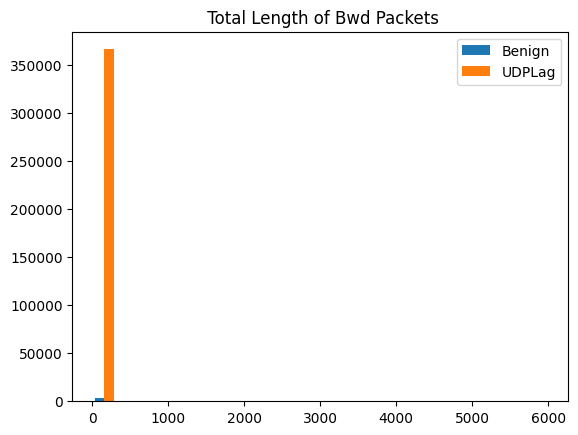

In [17]:
# Histogram penyebaran data benign dan malware pada fitur Total Length of Bwd Packets.
x = BenignData[" Total Length of Bwd Packets"]
y = MalwareData[" Total Length of Bwd Packets"]
bins = np.linspace(0, 6000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 6000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Total Length of Bwd Packets")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

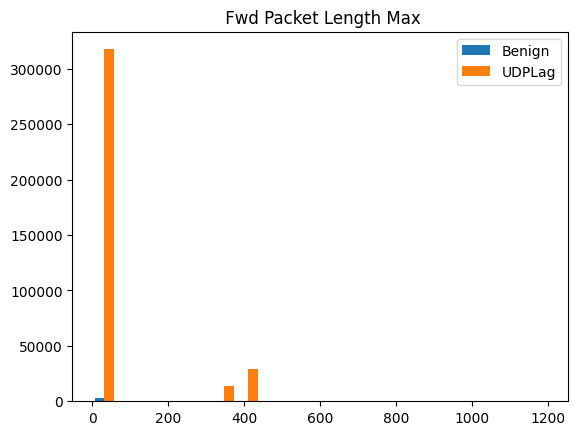

In [18]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Packet Length Max.
x = BenignData[" Fwd Packet Length Max"]
y = MalwareData[" Fwd Packet Length Max"]
bins = np.linspace(0, 1200, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1200, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Packet Length Max")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

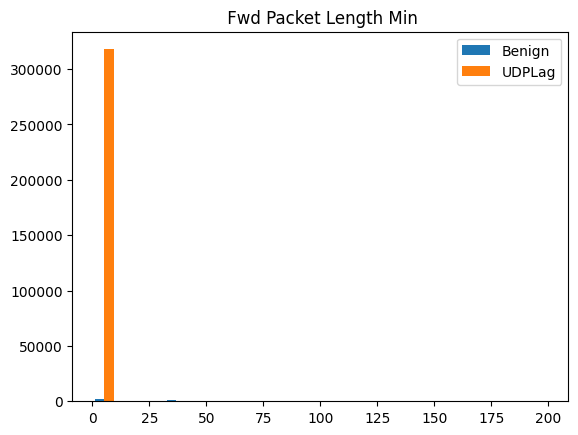

In [19]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Packet Length Min.
x = BenignData[" Fwd Packet Length Min"]
y = MalwareData[" Fwd Packet Length Min"]
bins = np.linspace(0, 200, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Packet Length Min")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

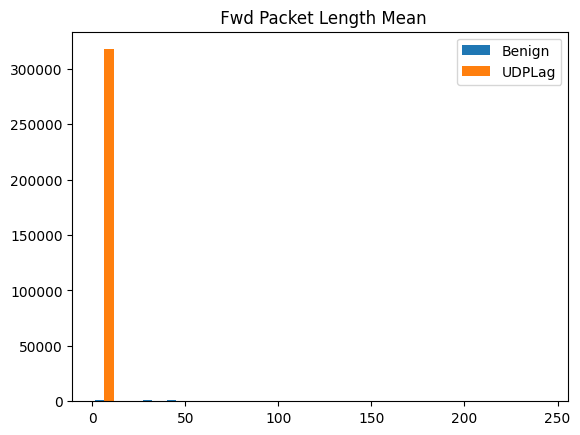

In [20]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Packet Length Mean.
x = BenignData[" Fwd Packet Length Mean"]
y = MalwareData[" Fwd Packet Length Mean"]
bins = np.linspace(0, 245, 20) # Berbeda karena mayoritas data bernilai 0 sampai 245, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Packet Length Mean")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

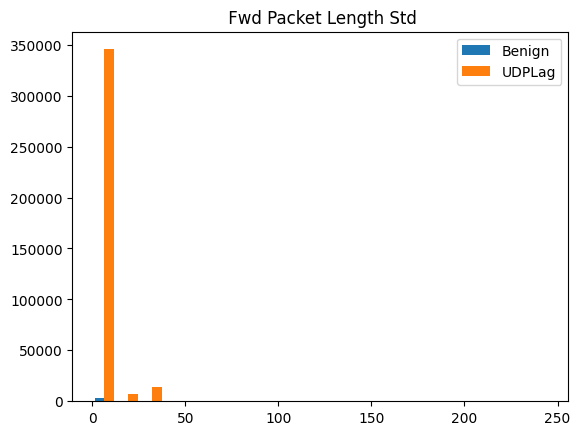

In [21]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Packet Length Std.
x = BenignData[" Fwd Packet Length Std"]
y = MalwareData[" Fwd Packet Length Std"]
bins = np.linspace(0, 245, 20) # Berbeda karena mayoritas data bernilai 0 sampai 245, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Packet Length Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

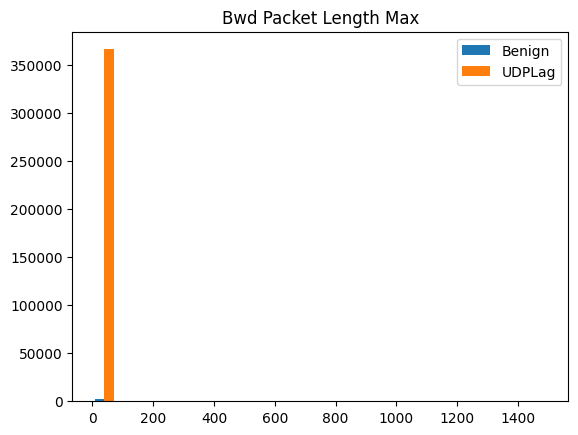

In [22]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Packet Length Max.
x = BenignData["Bwd Packet Length Max"]
y = MalwareData["Bwd Packet Length Max"]
bins = np.linspace(0, 1500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Bwd Packet Length Max")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

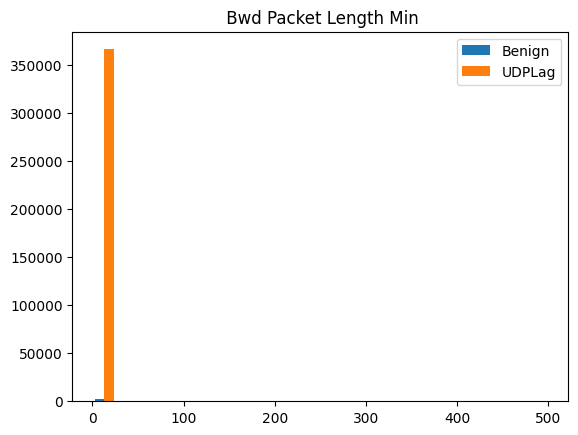

In [23]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Packet Length Min.
x = BenignData[" Bwd Packet Length Min"]
y = MalwareData[" Bwd Packet Length Min"]
bins = np.linspace(0, 500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd Packet Length Min")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

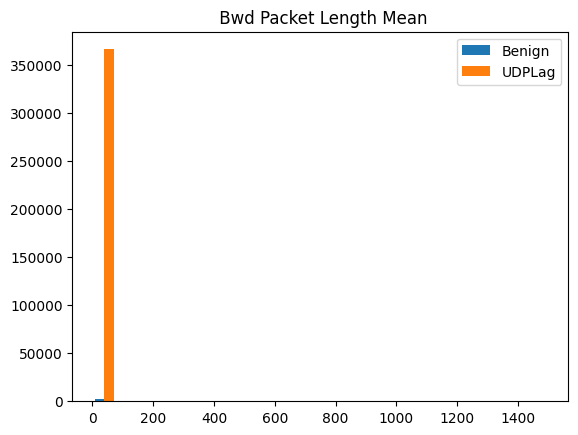

In [24]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Packet Length Mean.
x = BenignData[" Bwd Packet Length Mean"]
y = MalwareData[" Bwd Packet Length Mean"]
bins = np.linspace(0, 1500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd Packet Length Mean")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

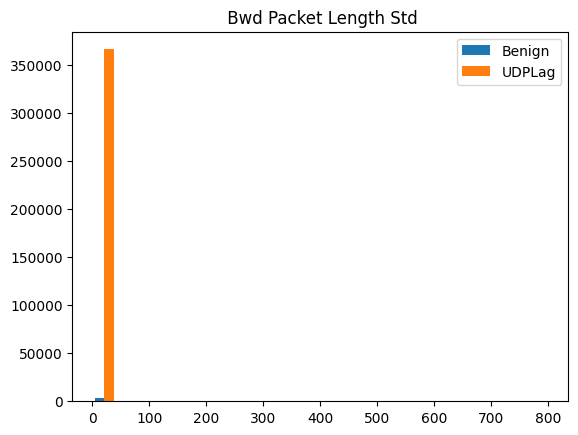

In [25]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Packet Length Std.
x = BenignData[" Bwd Packet Length Std"]
y = MalwareData[" Bwd Packet Length Std"]
bins = np.linspace(0, 800, 20) # Berbeda karena mayoritas data bernilai 0 sampai 800, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd Packet Length Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

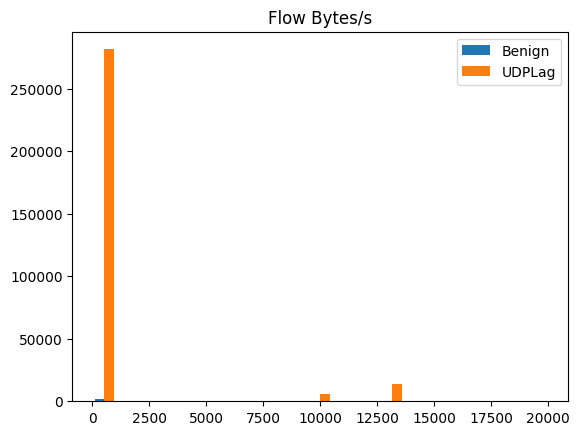

In [26]:
# Histogram penyebaran data benign dan malware pada fitur Flow Bytes/s.
x = BenignData["Flow Bytes/s"]
y = MalwareData["Flow Bytes/s"]
bins = np.linspace(0, 20000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Flow Bytes/s")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

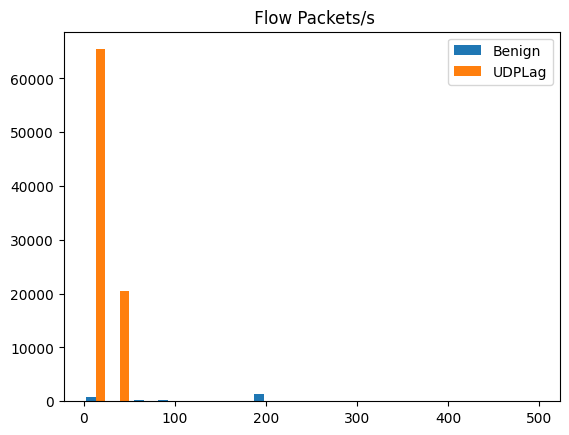

In [27]:
# Histogram penyebaran data benign dan malware pada fitur Flow Packets/s.
x = BenignData[" Flow Packets/s"]
y = MalwareData[" Flow Packets/s"]
bins = np.linspace(0, 500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Flow Packets/s")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

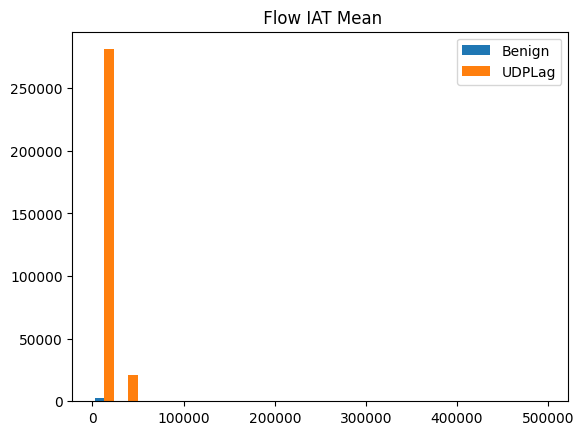

In [28]:
# Histogram penyebaran data benign dan malware pada fitur Flow IAT Mean.
x = BenignData[" Flow IAT Mean"]
y = MalwareData[" Flow IAT Mean"]
bins = np.linspace(0, 500000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 500000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Flow IAT Mean")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

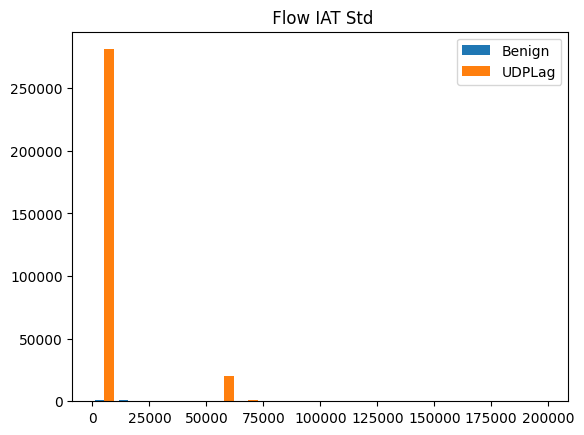

In [29]:
# Histogram penyebaran data benign dan malware pada fitur Flow IAT Std.
x = BenignData[" Flow IAT Std"]
y = MalwareData[" Flow IAT Std"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Flow IAT Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

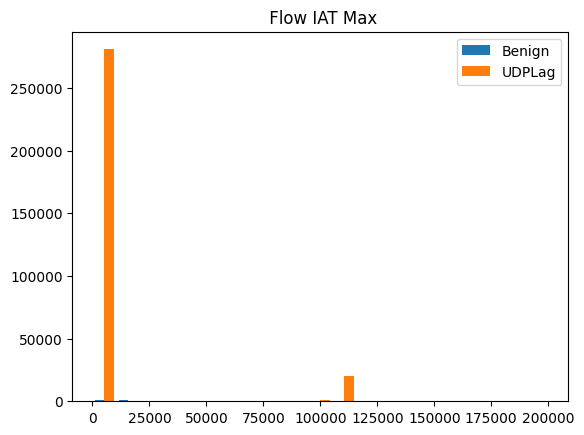

In [30]:
# Histogram penyebaran data benign dan malware pada fitur Flow IAT Max.
x = BenignData[" Flow IAT Max"]
y = MalwareData[" Flow IAT Max"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Flow IAT Max")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

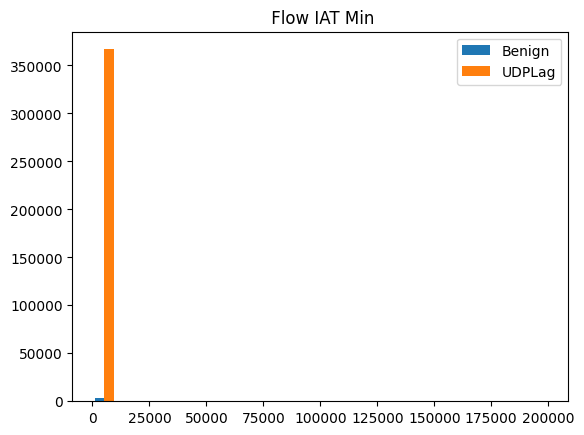

In [31]:
# Histogram penyebaran data benign dan malware pada fitur Flow IAT Min.
x = BenignData[" Flow IAT Min"]
y = MalwareData[" Flow IAT Min"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Flow IAT Min")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

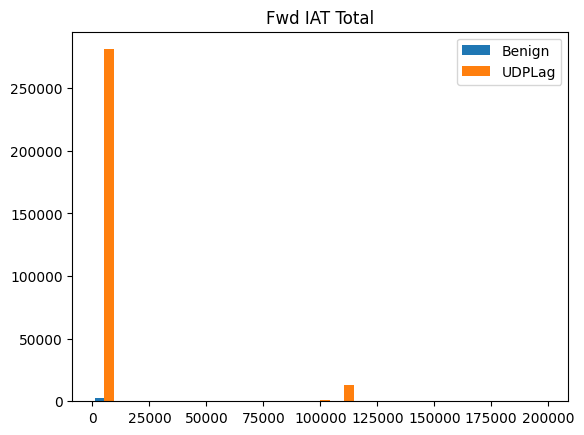

In [32]:
# Histogram penyebaran data benign dan malware pada fitur Fwd IAT Total.
x = BenignData["Fwd IAT Total"]
y = MalwareData["Fwd IAT Total"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Fwd IAT Total")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

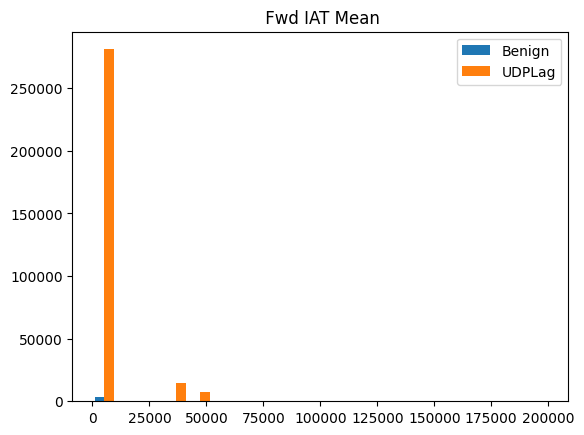

In [33]:
# Histogram penyebaran data benign dan malware pada fitur Fwd IAT Mean.
x = BenignData[" Fwd IAT Mean"]
y = MalwareData[" Fwd IAT Mean"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd IAT Mean")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

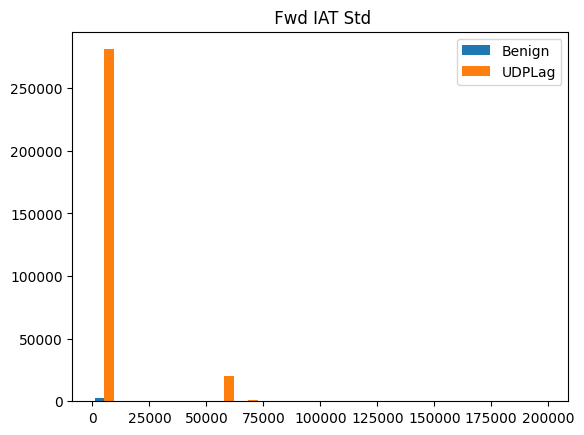

In [34]:
# Histogram penyebaran data benign dan malware pada fitur Fwd IAT Std.
x = BenignData[" Fwd IAT Std"]
y = MalwareData[" Fwd IAT Std"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd IAT Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

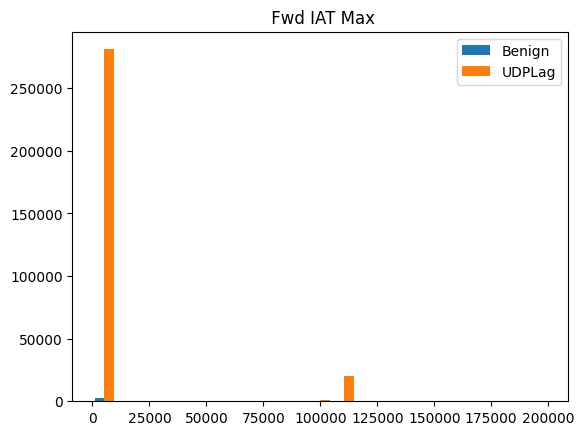

In [35]:
# Histogram penyebaran data benign dan malware pada fitur Fwd IAT Max.
x = BenignData[" Fwd IAT Max"]
y = MalwareData[" Fwd IAT Max"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd IAT Max")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

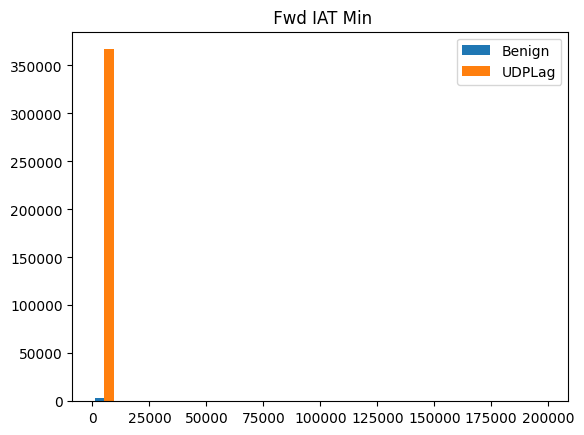

In [36]:
# Histogram penyebaran data benign dan malware pada fitur Fwd IAT Min.
x = BenignData[" Fwd IAT Min"]
y = MalwareData[" Fwd IAT Min"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd IAT Min")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

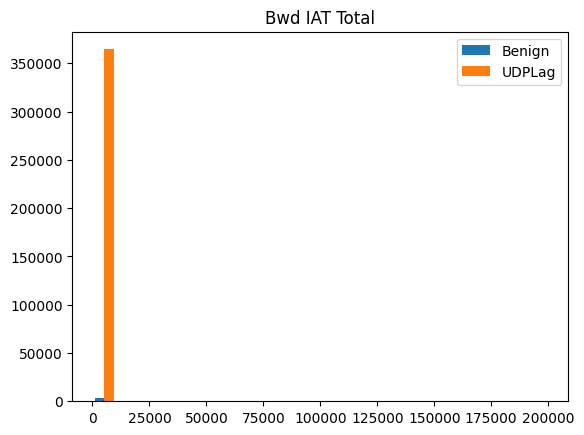

In [37]:
# Histogram penyebaran data benign dan malware pada fitur Bwd IAT Total.
x = BenignData["Bwd IAT Total"]
y = MalwareData["Bwd IAT Total"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Bwd IAT Total")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

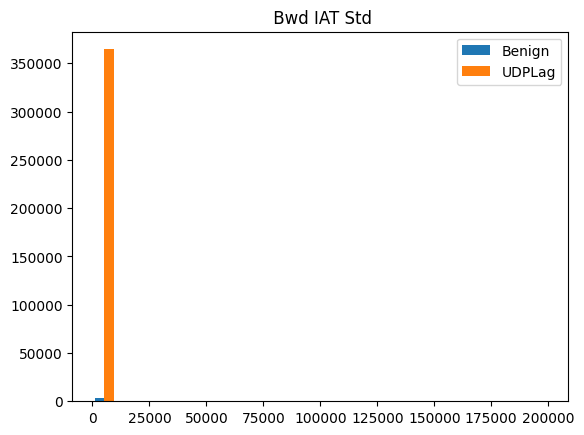

In [38]:
# Histogram penyebaran data benign dan malware pada fitur Bwd IAT Std.
x = BenignData[" Bwd IAT Std"]
y = MalwareData[" Bwd IAT Std"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd IAT Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

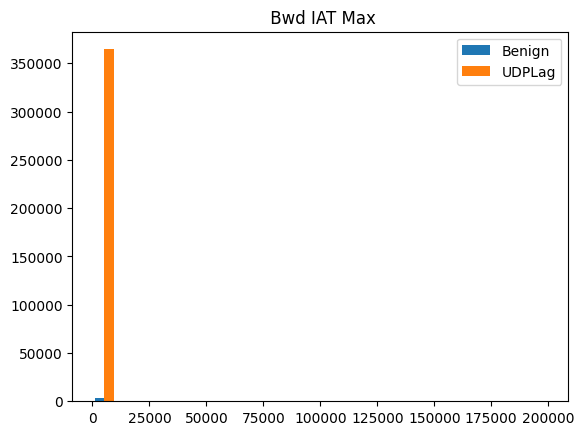

In [39]:
# Histogram penyebaran data benign dan malware pada fitur Bwd IAT Max.
x = BenignData[" Bwd IAT Max"]
y = MalwareData[" Bwd IAT Max"]
bins = np.linspace(0, 200000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd IAT Max")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

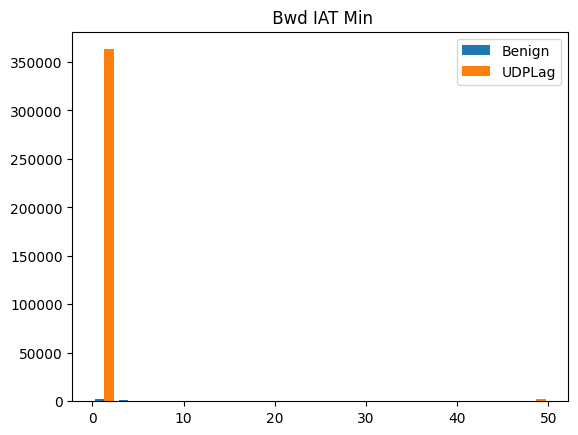

In [40]:
# Histogram penyebaran data benign dan malware pada fitur Bwd IAT Min.
x = BenignData[" Bwd IAT Min"]
y = MalwareData[" Bwd IAT Min"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd IAT Min")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

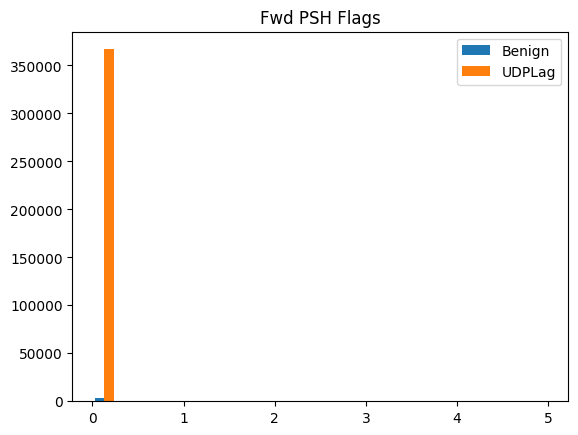

In [41]:
# Histogram penyebaran data benign dan malware pada fitur Fwd PSH Flags.
x = BenignData["Fwd PSH Flags"]
y = MalwareData["Fwd PSH Flags"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Fwd PSH Flags")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

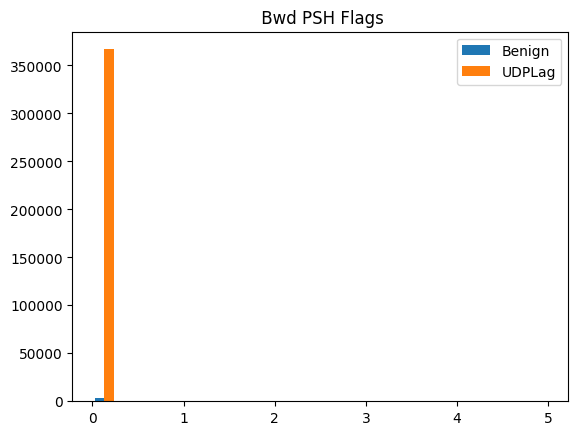

In [42]:
# Histogram penyebaran data benign dan malware pada fitur Bwd PSH Flags.
x = BenignData[" Bwd PSH Flags"]
y = MalwareData[" Bwd PSH Flags"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd PSH Flags")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

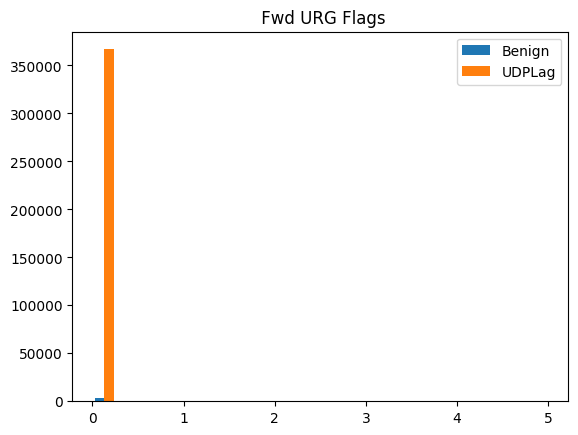

In [43]:
# Histogram penyebaran data benign dan malware pada fitur Fwd URG Flags.
x = BenignData[" Fwd URG Flags"]
y = MalwareData[" Fwd URG Flags"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd URG Flags")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

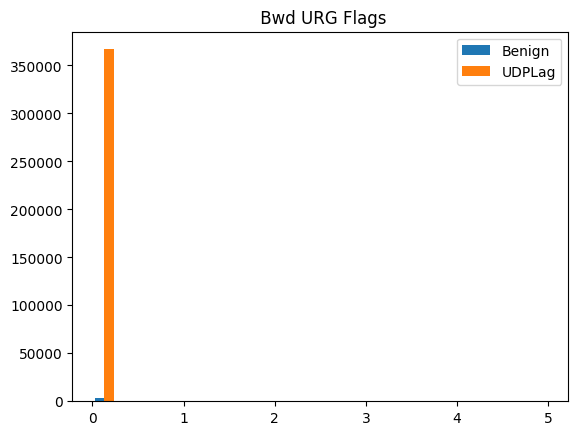

In [44]:
# Histogram penyebaran data benign dan malware pada fitur Bwd URG Flags.
x = BenignData[" Bwd URG Flags"]
y = MalwareData[" Bwd URG Flags"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd URG Flags")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

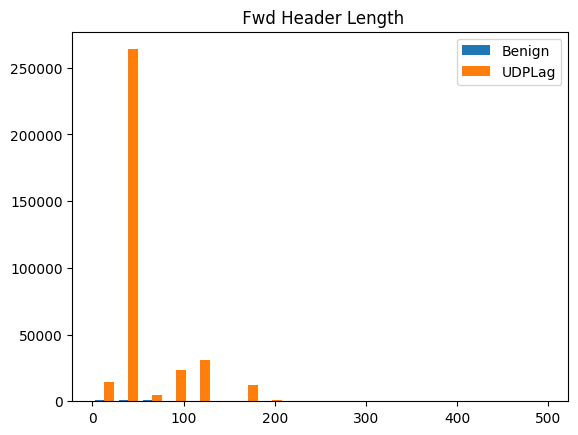

In [45]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Header Length.
x = BenignData[" Fwd Header Length"]
y = MalwareData[" Fwd Header Length"]
bins = np.linspace(0, 500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Header Length")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

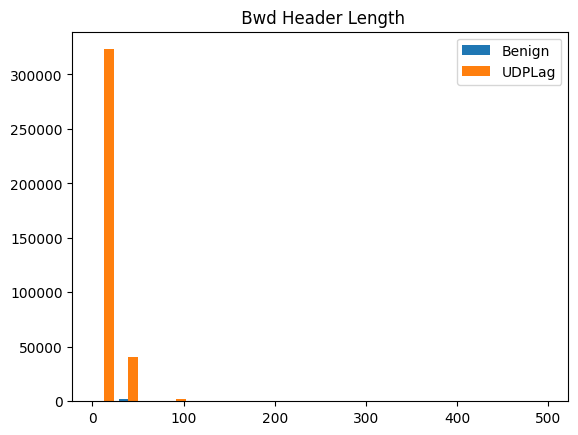

In [46]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Header Length.
x = BenignData[" Bwd Header Length"]
y = MalwareData[" Bwd Header Length"]
bins = np.linspace(0, 500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd Header Length")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

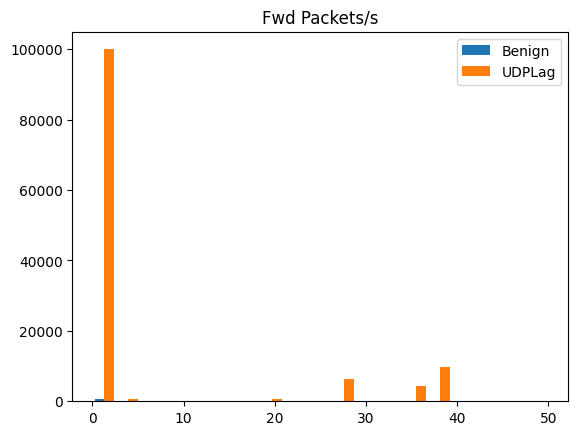

In [47]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Packets/s.
x = BenignData["Fwd Packets/s"]
y = MalwareData["Fwd Packets/s"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Fwd Packets/s")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

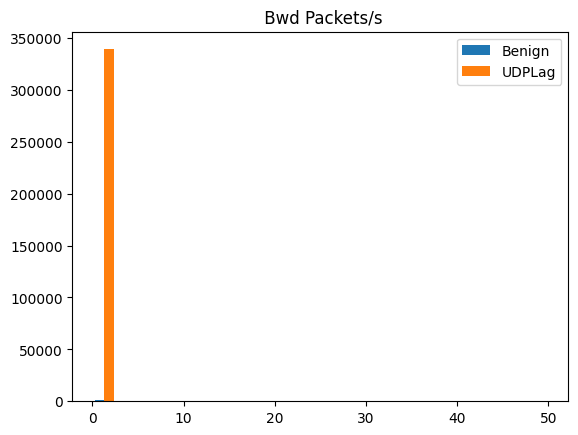

In [48]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Packets/s.
x = BenignData[" Bwd Packets/s"]
y = MalwareData[" Bwd Packets/s"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd Packets/s")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

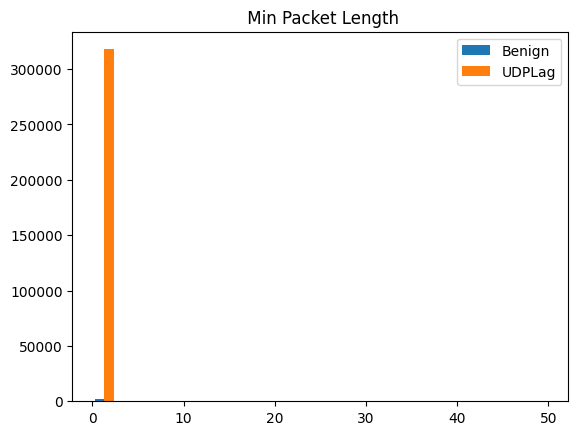

In [49]:
# Histogram penyebaran data benign dan malware pada fitur Min Packet Length.
x = BenignData[" Min Packet Length"]
y = MalwareData[" Min Packet Length"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Min Packet Length")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

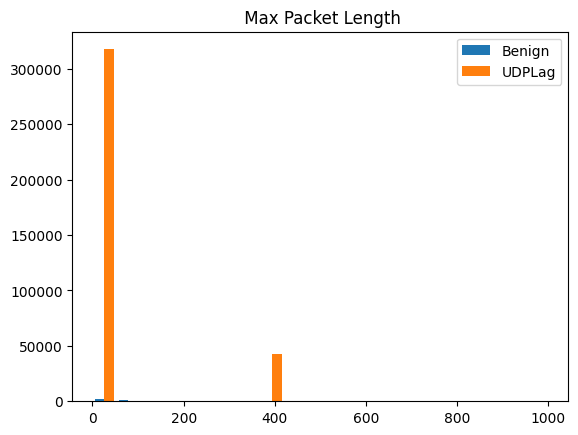

In [50]:
# Histogram penyebaran data benign dan malware pada fitur Max Packet Length.
x = BenignData[" Max Packet Length"]
y = MalwareData[" Max Packet Length"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Max Packet Length")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

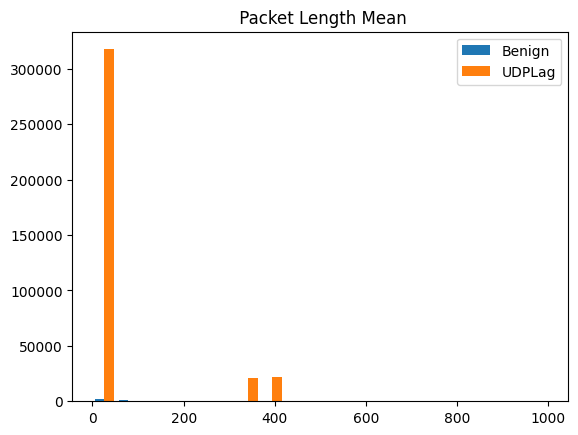

In [51]:
# Histogram penyebaran data benign dan malware pada fitur Packet Length Mean.
x = BenignData[" Packet Length Mean"]
y = MalwareData[" Packet Length Mean"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Packet Length Mean")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

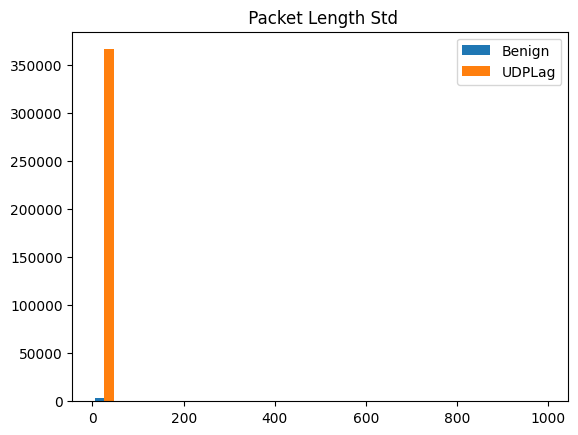

In [52]:
# Histogram penyebaran data benign dan malware pada fitur Packet Length Std.
x = BenignData[" Packet Length Std"]
y = MalwareData[" Packet Length Std"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Packet Length Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

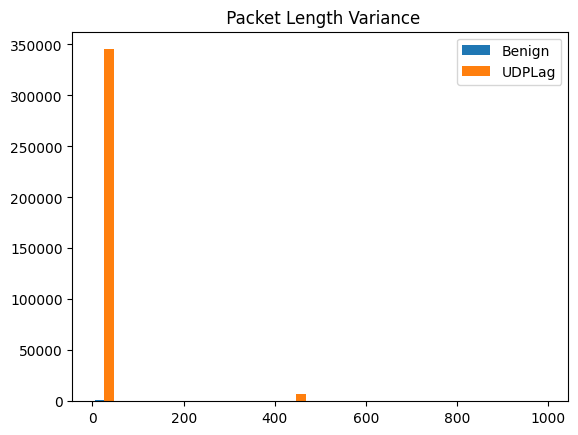

In [53]:
# Histogram penyebaran data benign dan malware pada fitur Packet Length Variance.
x = BenignData[" Packet Length Variance"]
y = MalwareData[" Packet Length Variance"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Packet Length Variance")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

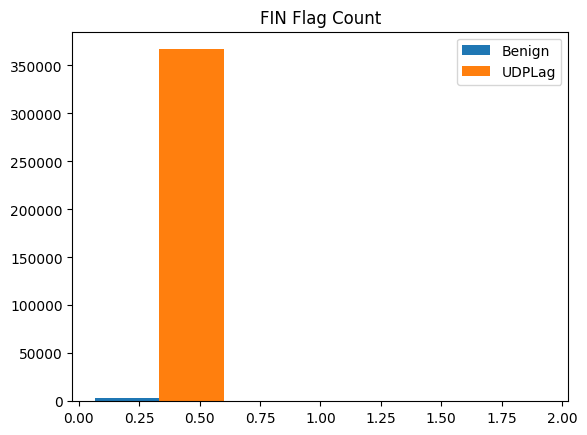

In [54]:
# Histogram penyebaran data benign dan malware pada fitur FIN Flag Count
x = BenignData["FIN Flag Count"]
y = MalwareData["FIN Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FIN Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

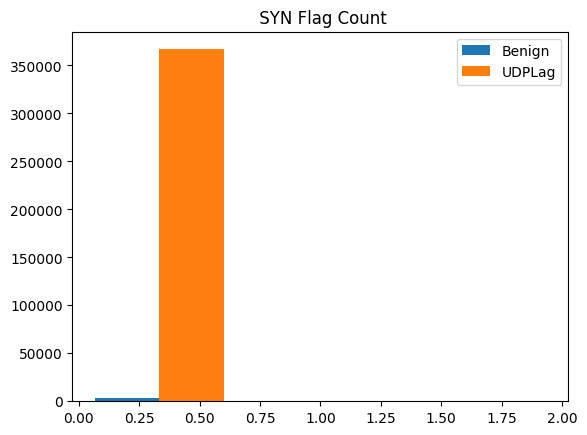

In [55]:
# Histogram penyebaran data benign dan malware pada fitur SYN Flag Count
x = BenignData[" SYN Flag Count"]
y = MalwareData[" SYN Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" SYN Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

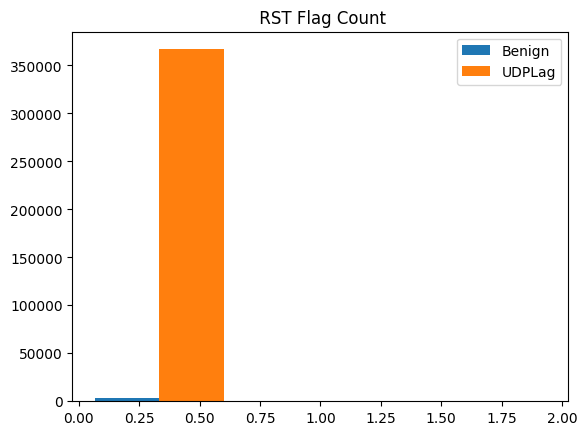

In [56]:
# Histogram penyebaran data benign dan malware pada fitur RST Flag Count
x = BenignData[" RST Flag Count"]
y = MalwareData[" RST Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" RST Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

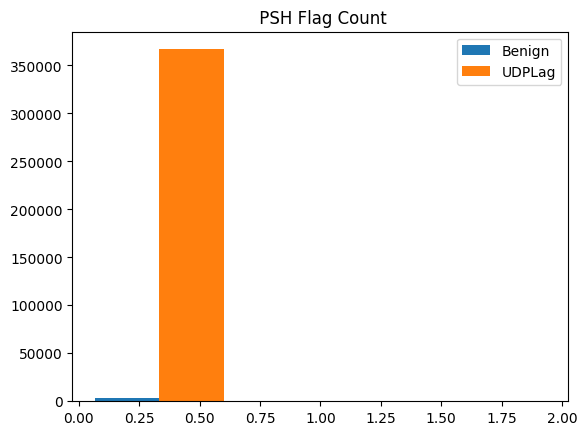

In [57]:
# Histogram penyebaran data benign dan malware pada fitur PSH Flag Count
x = BenignData[" PSH Flag Count"]
y = MalwareData[" PSH Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" PSH Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

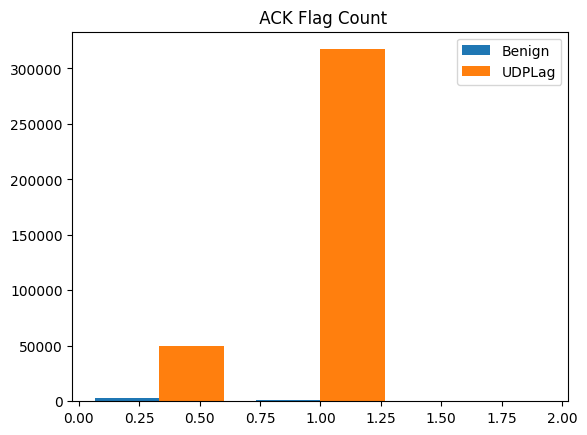

In [58]:
# Histogram penyebaran data benign dan malware pada fitur ACK Flag Count
x = BenignData[" ACK Flag Count"]
y = MalwareData[" ACK Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" ACK Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

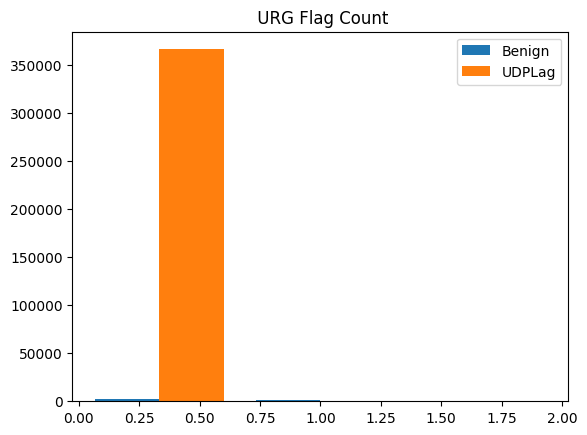

In [59]:
# Histogram penyebaran data benign dan malware pada fitur URG Flag Count
x = BenignData[" URG Flag Count"]
y = MalwareData[" URG Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" URG Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

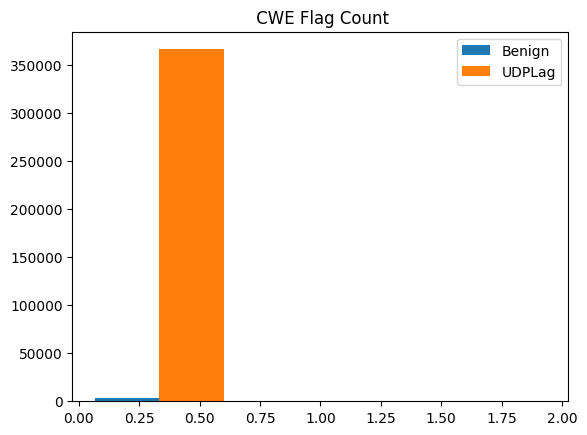

In [60]:
# Histogram penyebaran data benign dan malware pada fitur CWE Flag Count
x = BenignData[" CWE Flag Count"]
y = MalwareData[" CWE Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" CWE Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

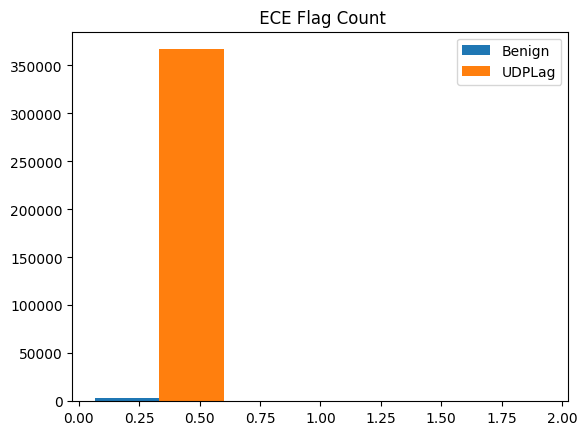

In [61]:
# Histogram penyebaran data benign dan malware pada fitur ECE Flag Count
x = BenignData[" ECE Flag Count"]
y = MalwareData[" ECE Flag Count"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" ECE Flag Count")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

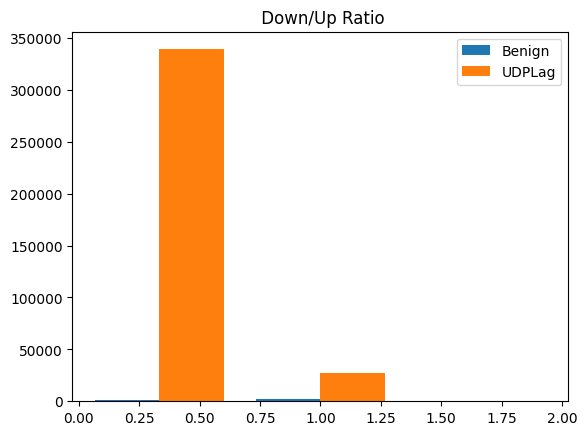

In [62]:
# Histogram penyebaran data benign dan malware pada fitur Down/Up Ratio
x = BenignData[" Down/Up Ratio"]
y = MalwareData[" Down/Up Ratio"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Down/Up Ratio")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

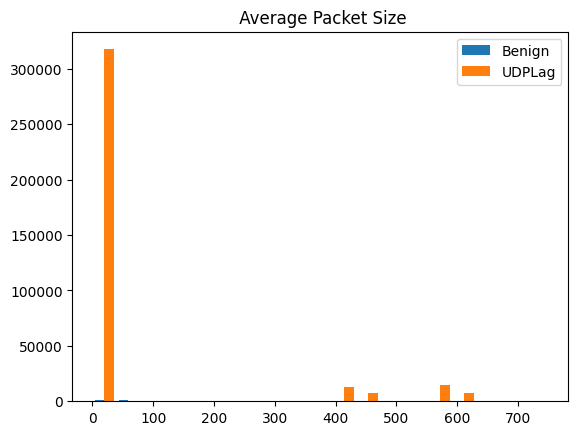

In [63]:
# Histogram penyebaran data benign dan malware pada fitur Average Packet Size
x = BenignData[" Average Packet Size"]
y = MalwareData[" Average Packet Size"]
bins = np.linspace(0, 750, 20) # Berbeda karena mayoritas data bernilai 0 sampai 750, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Average Packet Size")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

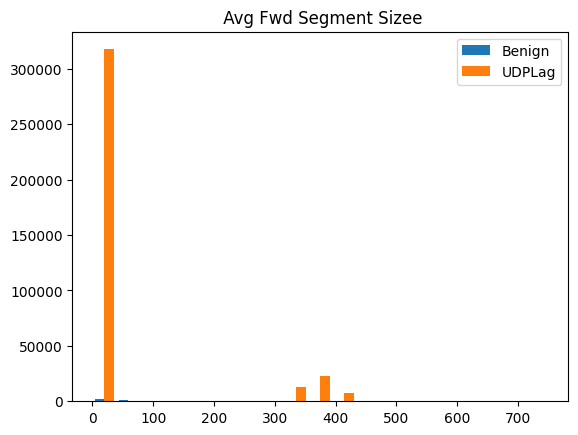

In [64]:
# Histogram penyebaran data benign dan malware pada fitur Avg Fwd Segment Size
x = BenignData[" Avg Fwd Segment Size"]
y = MalwareData[" Avg Fwd Segment Size"]
bins = np.linspace(0, 750, 20) # Berbeda karena mayoritas data bernilai 0 sampai 750, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Avg Fwd Segment Sizee")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

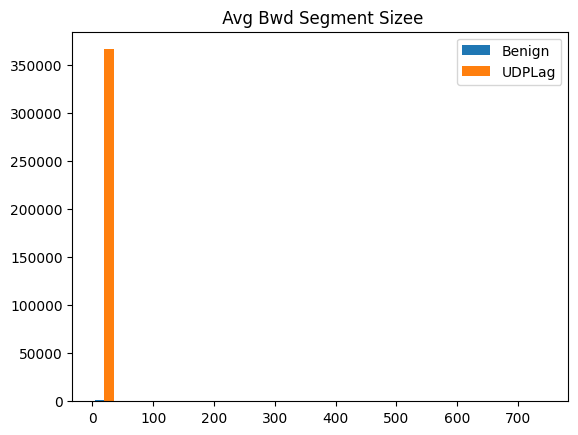

In [65]:
# Histogram penyebaran data benign dan malware pada fitur Avg Bwd Segment Size
x = BenignData[" Avg Bwd Segment Size"]
y = MalwareData[" Avg Bwd Segment Size"]
bins = np.linspace(0, 750, 20) # Berbeda karena mayoritas data bernilai 0 sampai 750, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Avg Bwd Segment Sizee")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

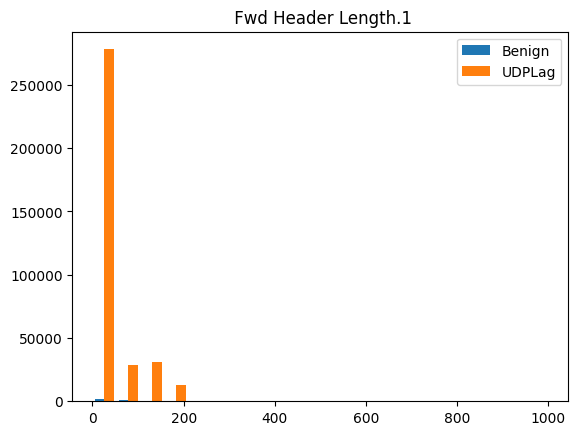

In [66]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Header Length.1
x = BenignData[" Fwd Header Length.1"]
y = MalwareData[" Fwd Header Length.1"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Header Length.1")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

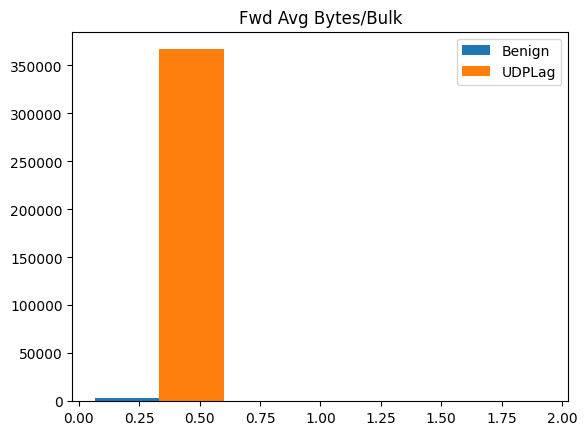

In [67]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Avg Bytes/Bulk
x = BenignData["Fwd Avg Bytes/Bulk"]
y = MalwareData["Fwd Avg Bytes/Bulk"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Fwd Avg Bytes/Bulk")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

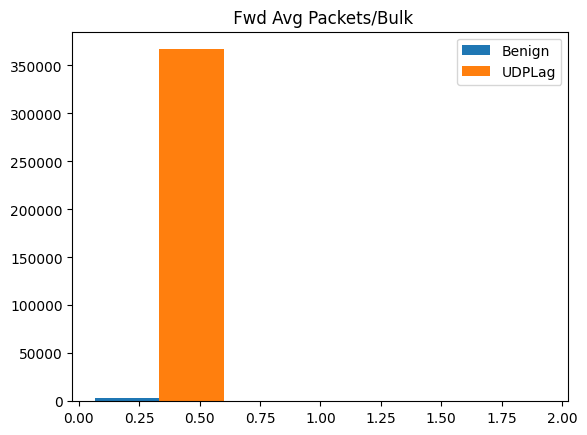

In [68]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Avg Packets/Bulk
x = BenignData[" Fwd Avg Packets/Bulk"]
y = MalwareData[" Fwd Avg Packets/Bulk"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Avg Packets/Bulk")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

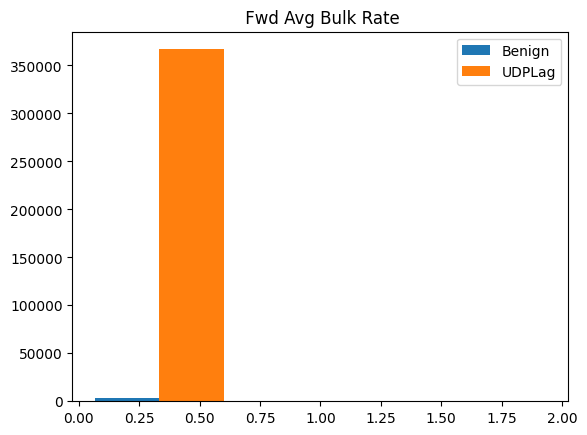

In [69]:
# Histogram penyebaran data benign dan malware pada fitur Fwd Avg Bulk Rate
x = BenignData[" Fwd Avg Bulk Rate"]
y = MalwareData[" Fwd Avg Bulk Rate"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Fwd Avg Bulk Rate")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

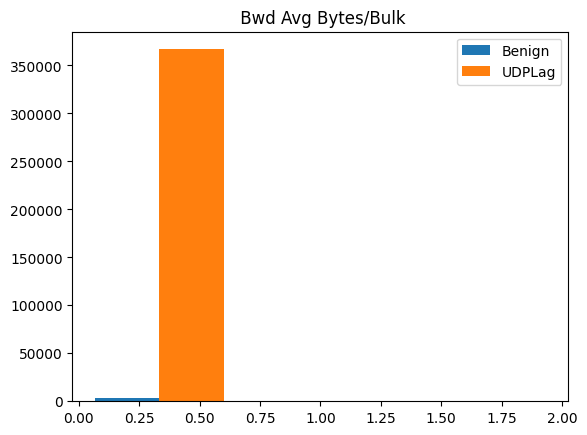

In [70]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Avg Bytes/Bulk
x = BenignData[" Bwd Avg Bytes/Bulk"]
y = MalwareData[" Bwd Avg Bytes/Bulk"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd Avg Bytes/Bulk")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

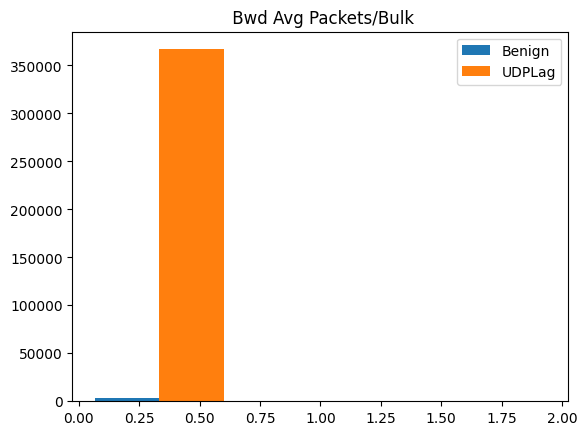

In [71]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Avg Packets/Bulk
x = BenignData[" Bwd Avg Packets/Bulk"]
y = MalwareData[" Bwd Avg Packets/Bulk"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Bwd Avg Packets/Bulk")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

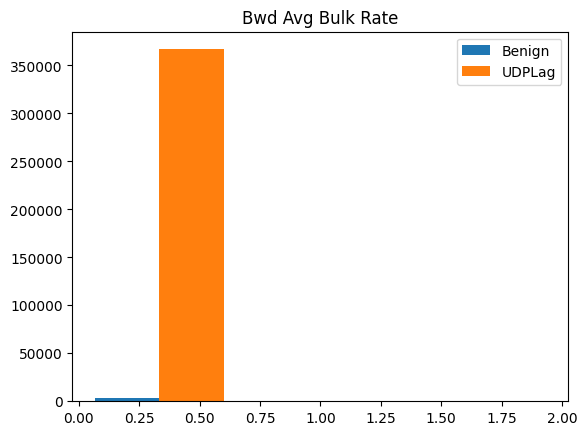

In [72]:
# Histogram penyebaran data benign dan malware pada fitur Bwd Avg Bulk Rate
x = BenignData["Bwd Avg Bulk Rate"]
y = MalwareData["Bwd Avg Bulk Rate"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Bwd Avg Bulk Rate")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

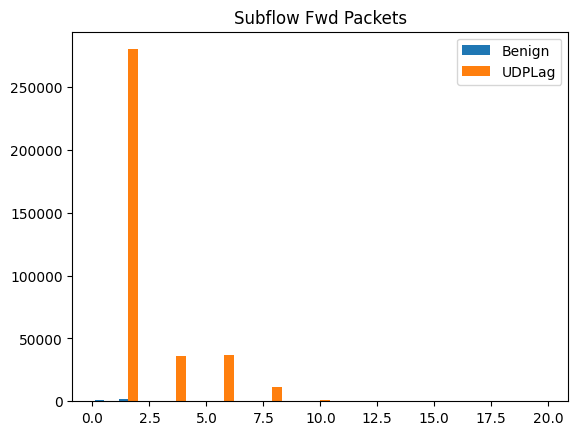

In [73]:
# Histogram penyebaran data benign dan malware pada fitur Subflow Fwd Packets
x = BenignData["Subflow Fwd Packets"]
y = MalwareData["Subflow Fwd Packets"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Subflow Fwd Packets")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

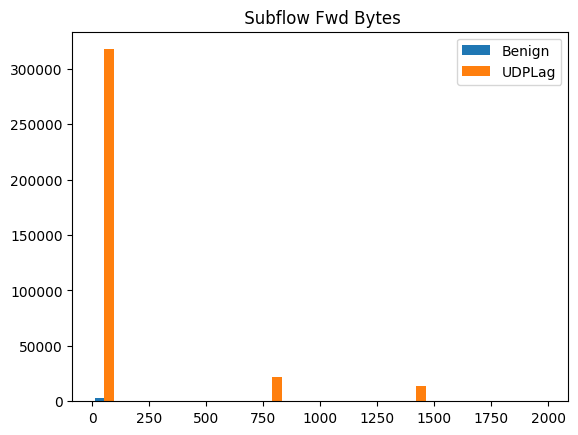

In [74]:
# Histogram penyebaran data benign dan malware pada fitur Subflow Fwd Bytes
x = BenignData[" Subflow Fwd Bytes"]
y = MalwareData[" Subflow Fwd Bytes"]
bins = np.linspace(0, 2000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Subflow Fwd Bytes")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

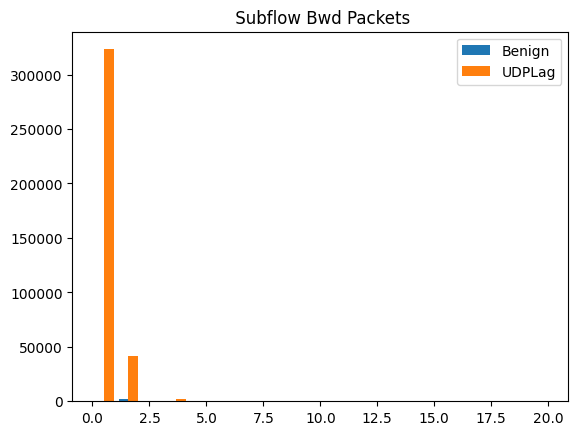

In [75]:
# Histogram penyebaran data benign dan malware pada fitur Subflow Bwd Packets
x = BenignData[" Subflow Bwd Packets"]
y = MalwareData[" Subflow Bwd Packets"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Subflow Bwd Packets")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

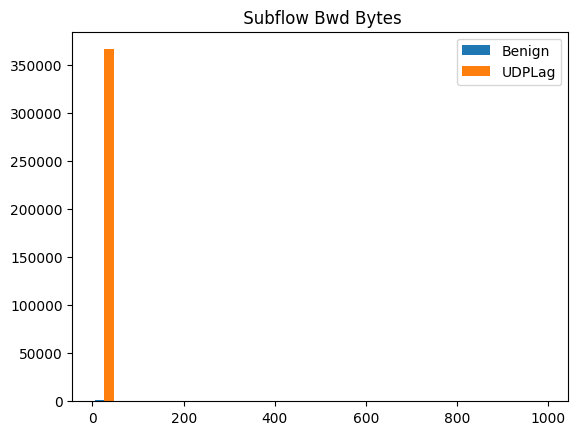

In [76]:
# Histogram penyebaran data benign dan malware pada fitur Subflow Bwd Bytes
x = BenignData[" Subflow Bwd Bytes"]
y = MalwareData[" Subflow Bwd Bytes"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Subflow Bwd Bytes")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

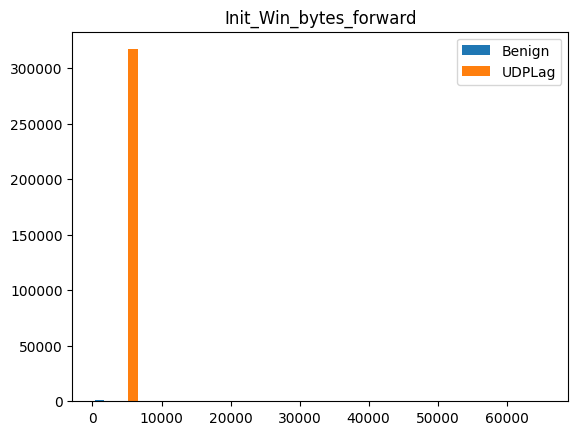

In [77]:
# Histogram penyebaran data benign dan malware pada fitur Init_Win_bytes_forward
x = BenignData["Init_Win_bytes_forward"]
y = MalwareData["Init_Win_bytes_forward"]
bins = np.linspace(0, 66000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 66000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Init_Win_bytes_forward")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

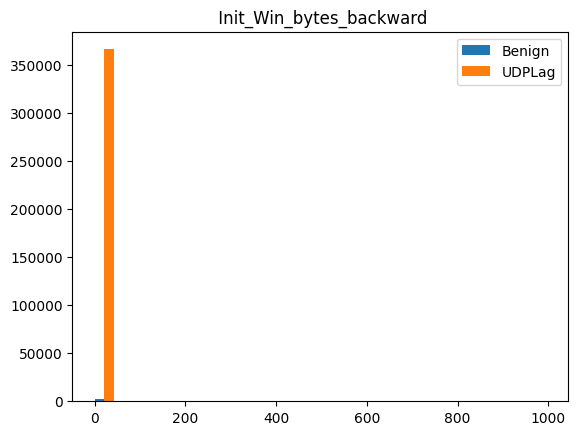

In [78]:
# Histogram penyebaran data benign dan malware pada fitur Init_Win_bytes_backward
x = BenignData[" Init_Win_bytes_backward"]
y = MalwareData[" Init_Win_bytes_backward"]
bins = np.linspace(-5, 1000, 20) # Berbeda karena mayoritas data bernilai -5 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Init_Win_bytes_backward")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

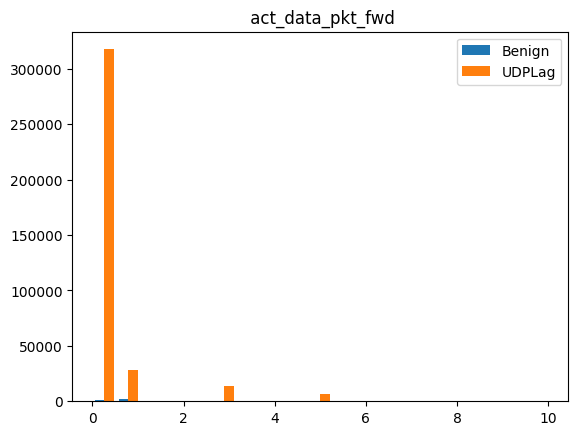

In [79]:
# Histogram penyebaran data benign dan malware pada fitur act_data_pkt_fwd
x = BenignData[" act_data_pkt_fwd"]
y = MalwareData[" act_data_pkt_fwd"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" act_data_pkt_fwd")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

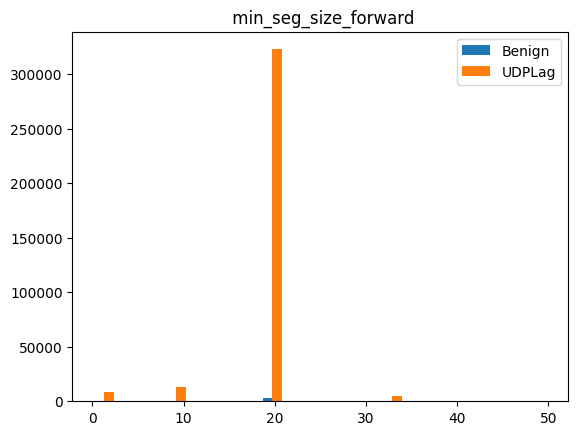

In [80]:
# Histogram penyebaran data benign dan malware pada fitur min_seg_size_forward
x = BenignData[" min_seg_size_forward"]
y = MalwareData[" min_seg_size_forward"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" min_seg_size_forward")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

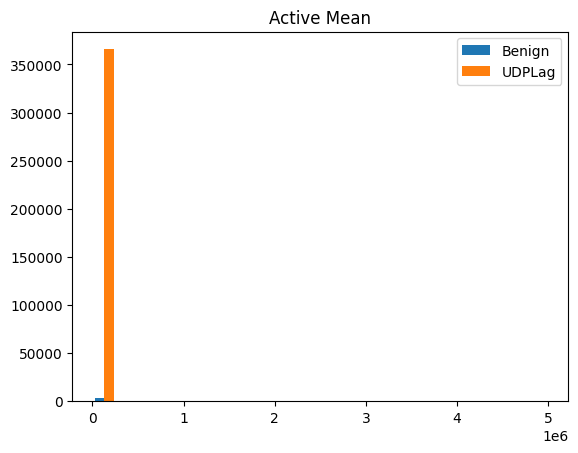

In [81]:
# Histogram penyebaran data benign dan malware pada fitur Active Mean
x = BenignData["Active Mean"]
y = MalwareData["Active Mean"]
bins = np.linspace(0, 5000000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5000000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Active Mean")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

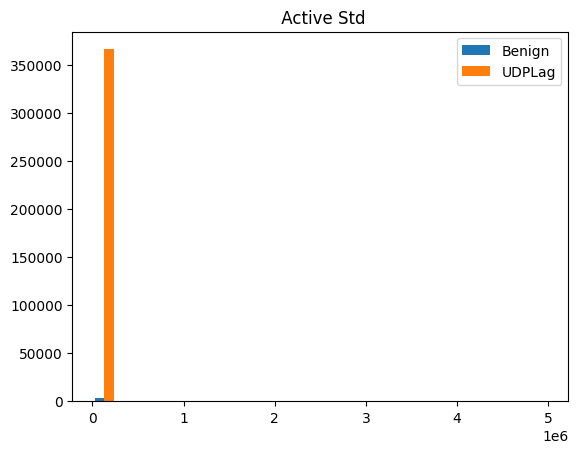

In [82]:
# Histogram penyebaran data benign dan malware pada fitur Active Std
x = BenignData[" Active Std"]
y = MalwareData[" Active Std"]
bins = np.linspace(0, 5000000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5000000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Active Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

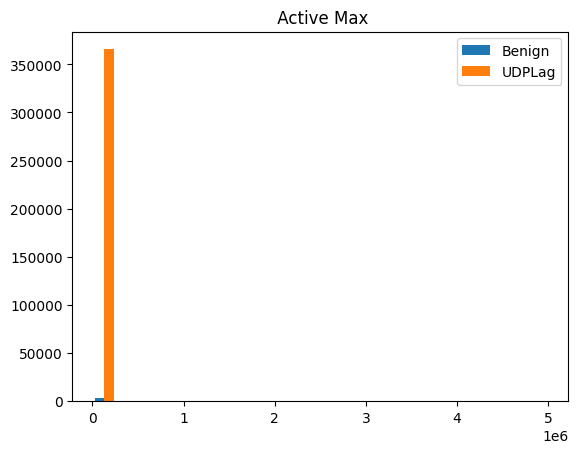

In [83]:
# Histogram penyebaran data benign dan malware pada fitur Active Max
x = BenignData[" Active Max"]
y = MalwareData[" Active Max"]
bins = np.linspace(0, 5000000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5000000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Active Max")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

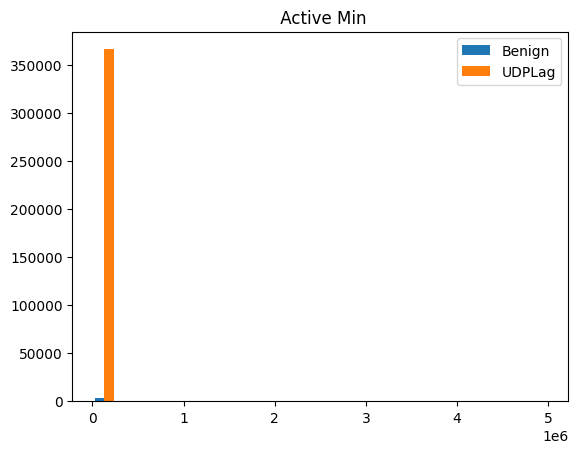

In [84]:
# Histogram penyebaran data benign dan malware pada fitur Active Min
x = BenignData[" Active Min"]
y = MalwareData[" Active Min"]
bins = np.linspace(0, 5000000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5000000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Active Min")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

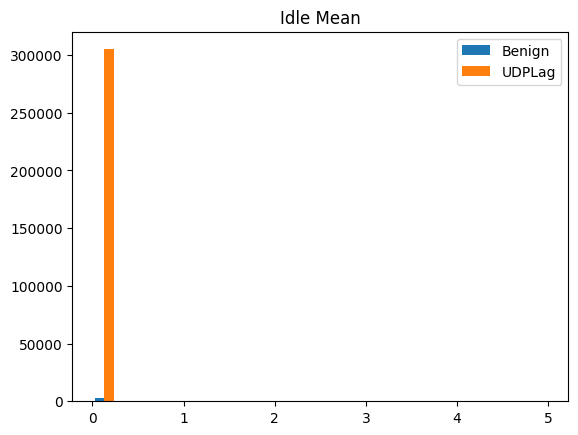

In [85]:
# Histogram penyebaran data benign dan malware pada fitur Idle Mean
x = BenignData["Idle Mean"]
y = MalwareData["Idle Mean"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Idle Mean")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

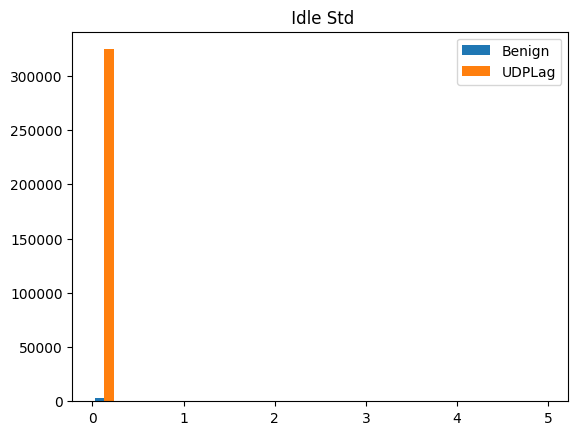

In [86]:
# Histogram penyebaran data benign dan malware pada fitur Idle Std
x = BenignData[" Idle Std"]
y = MalwareData[" Idle Std"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Idle Std")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

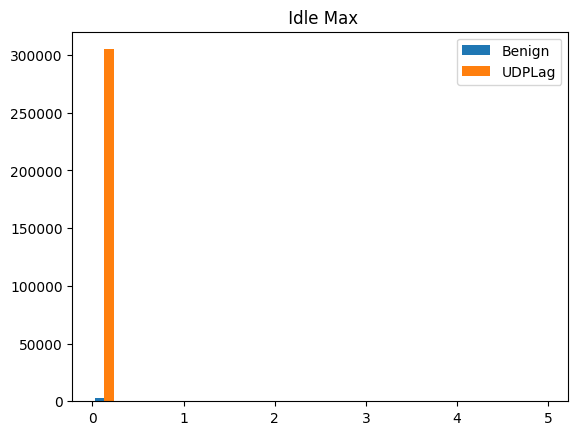

In [87]:
# Histogram penyebaran data benign dan malware pada fitur Idle Max
x = BenignData[" Idle Max"]
y = MalwareData[" Idle Max"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Idle Max")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

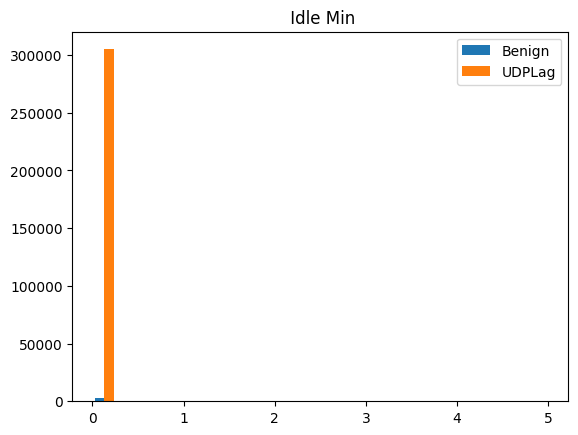

In [88]:
# Histogram penyebaran data benign dan malware pada fitur Idle Min
x = BenignData[" Idle Min"]
y = MalwareData[" Idle Min"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Idle Min")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

TypeError: '<=' not supported between instances of 'int' and 'str'

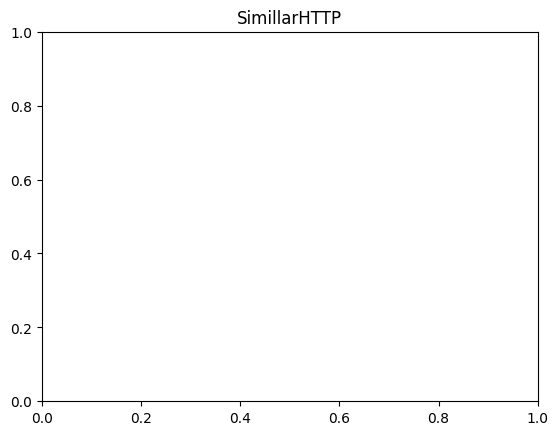

In [89]:
# Histogram penyebaran data benign dan malware pada fitur SimillarHTTP
x = BenignData["SimillarHTTP"]
y = MalwareData["SimillarHTTP"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SimillarHTTP")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

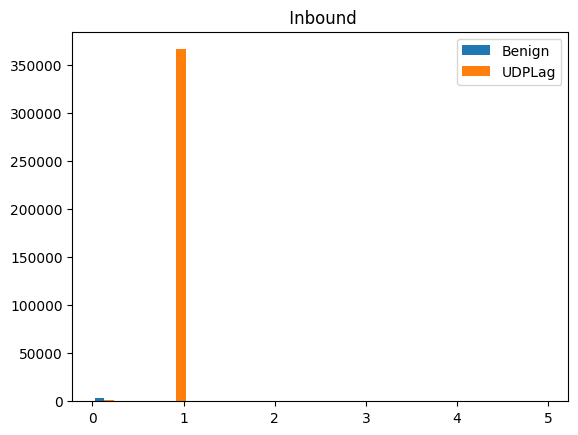

In [90]:
# Histogram penyebaran data benign dan malware pada fitur Inbound
x = BenignData[" Inbound"]
y = MalwareData[" Inbound"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Inbound")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

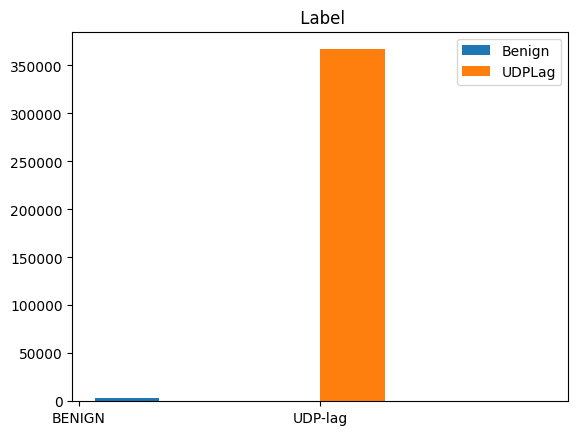

In [91]:
# Histogram penyebaran data benign dan malware pada fitur Label
x = BenignData[" Label"]
y = MalwareData[" Label"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title(" Label")
plt.hist([x,y], bins, label=['Benign', 'UDPLag'])
plt.legend(loc='upper right')
plt.show()

In [92]:
# Memilih dan menentukan feature yang berpotensi untuk threshold (Penyebarannya sangat terlihat dan 2 class dapat dipisahkan dengan mudah)
Dataset = DM.drop(['Unnamed: 0', 'Flow ID', ' Source IP', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Bwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min', 'SimillarHTTP', ' Label' ],axis=1).values # mendrop yang penyebarannya sangat kecil atau tidak dapat membendakan 2 class
Target = DM[' Label'].values # CLass karena merepresentasikan binary class

In [93]:
# Memilih 0.1% data dari setiap fitur/column
sample_size = int(0.001 * len(DM))
sampled_data = DM.groupby(' Label').apply(lambda x: x.iloc[:sample_size]).reset_index(drop=True)

In [94]:
# Menampilkan list feature yang digunakan
Features = sampled_data.drop(['Unnamed: 0', 'Flow ID', ' Source IP', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Bwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min', 'SimillarHTTP', ' Label' ],axis=1).columns.tolist()
print("         List Features yang akan dibandingkan kinerja-nya           ")
print("                                                                    ")
print("#   Column                                  Non-Null Count  Dtype   ")
print("---  ------                                  --------------  -----  ")
for i, column_name in enumerate(Features):
    print(f"{i+1:3} {column_name:40} {sampled_data[column_name].count():<15} {sampled_data[column_name].dtype}")

         List Features yang akan dibandingkan kinerja-nya           
                                                                    
#   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----  
  1  Source Port                             740             int64
  2  Inbound                                 740             int64


In [95]:
import time
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

hasil_threshold = []

def Thresholding(threshold, feature):
    # Mulai pengukuran waktu
    start_time = time.time()
    
    # Melakukan thresholding
    BenignDataThreshold = sampled_data[sampled_data[feature] > int(threshold)]
    MalwareDataThreshold = sampled_data[sampled_data[feature] <= int(threshold)]

    # Menentukan TP, TN, FP, FN
    # Untuk BenignDataThreshold
    y_true_benign = ["BENIGN"] * len(BenignDataThreshold)
    y_pred_benign = BenignDataThreshold[" Label"]

    # Untuk MalwareDataThreshold
    y_true_malware = ["UDP-lag"] * len(MalwareDataThreshold)
    y_pred_malware = MalwareDataThreshold[" Label"]

    # Menyatukan true labels dan predicted labels
    y_true = y_true_benign + y_true_malware
    y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Menghitung Precision, Recall, F1-score, dan Accuracy
    PrecisionThreshold = tp / (tp + fp) if (tp + fp) != 0 else 0
    RecallThreshold = tp / (tp + fn) if (tp + fn) != 0 else 0
    F1ScoreThreshold = 2 * ((PrecisionThreshold * RecallThreshold) / (PrecisionThreshold + RecallThreshold)) if (PrecisionThreshold + RecallThreshold) != 0 else 0
    AccuracyThreshold = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0

    # Menghitung waktu yang dibutuhkan
    elapsed_time = time.time() - start_time

    # Menyimpan hasil dalam matrix
    matrix = [[feature, threshold], [PrecisionThreshold], [RecallThreshold], [F1ScoreThreshold], [AccuracyThreshold], [elapsed_time]]
    hasil_threshold.append(matrix)

for feature in tqdm(Features, desc='Progress'):
    Max = sampled_data[feature].max()
    Min = sampled_data[feature].min()

    for x in range(int(Min), int(Max + 1)):
        Thresholding(x, feature)

print(hasil_threshold)


Progress: 100%|██████████████████████████████████████████████████████████████████████████| 2/2 [03:06<00:00, 93.18s/it]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [96]:
# Inisialisasi variabel winner untuk masing-masing metrik
winner_precision = [['', 0], [0], [0], [0], [0], [0]]
winner_recall = [['', 0], [0], [0], [0], [0], [0]]
winner_f1_score = [['', 0], [0], [0], [0], [0], [0]]
winner_accuracy = [['', 0], [0], [0], [0], [0], [0]]
winner_run_time = [['', 0], [0], [0], [0], [0], [float('inf')]]  # Memilih yang terendah, jadi diinisialisasi dengan tak hingga

for result in hasil_threshold:
    # Membandingkan Precision
    if result[1][0] > winner_precision[1][0]:
        winner_precision = result
    
    # Membandingkan Recall
    if result[2][0] > winner_recall[2][0]:
        winner_recall = result

    # Membandingkan F1-score
    if result[3][0] > winner_f1_score[3][0]:
        winner_f1_score = result

    # Membandingkan Accuracy
    if result[4][0] > winner_accuracy[4][0]:
        winner_accuracy = result

    # Membandingkan waktu running (run_time) untuk threshold tercepat (terkecil)
    if result[5][0] < winner_run_time[5][0]:
        winner_run_time = result

In [97]:
# Fungsi untuk memfilter dan plot berdasarkan pemenang
def plot_metrics_for_winner(winner, metric_name):
    winner_feature, winner_threshold = winner[0]

    # Memfilter hasil threshold untuk fitur pemenang
    winner_results = [result for result in hasil_threshold if result[0][0] == winner_feature]

    # Pisahkan hasil menjadi list berdasarkan threshold dan kolom metrik
    thresholds, precision, recall, f1_score, accuracy = [], [], [], [], []
    for result in winner_results:
        thresholds.append(result[0][1])
        precision.append(result[1][0])
        recall.append(result[2][0])
        f1_score.append(result[3][0])
        accuracy.append(result[4][0])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracy, label='Accuracy')
    plt.plot(thresholds, precision, label='Precision')
    plt.plot(thresholds, recall, label='Recall')
    plt.plot(thresholds, f1_score, label='F1 Score')

    plt.title(f'{metric_name} Winner: Metrics vs. Threshold for Feature {winner_feature}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

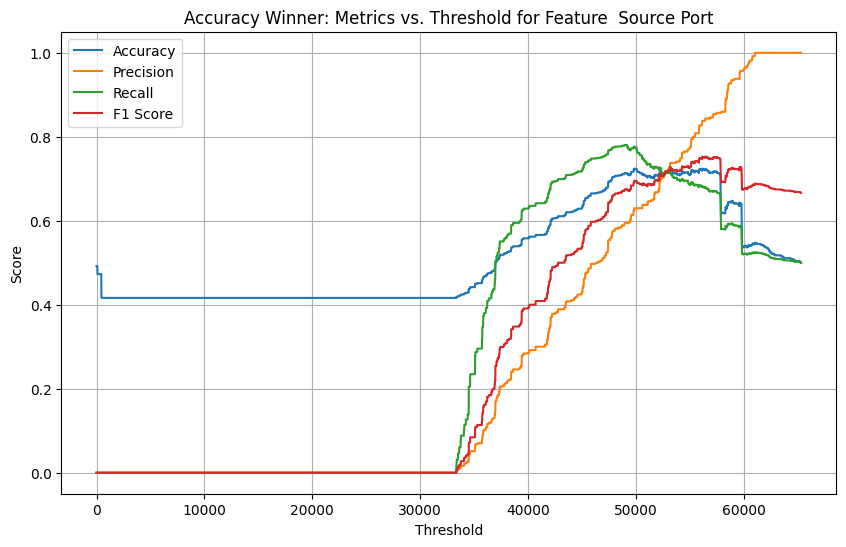

In [98]:
# Plot untuk Accuracy Winner
plot_metrics_for_winner(winner_accuracy, 'Accuracy')

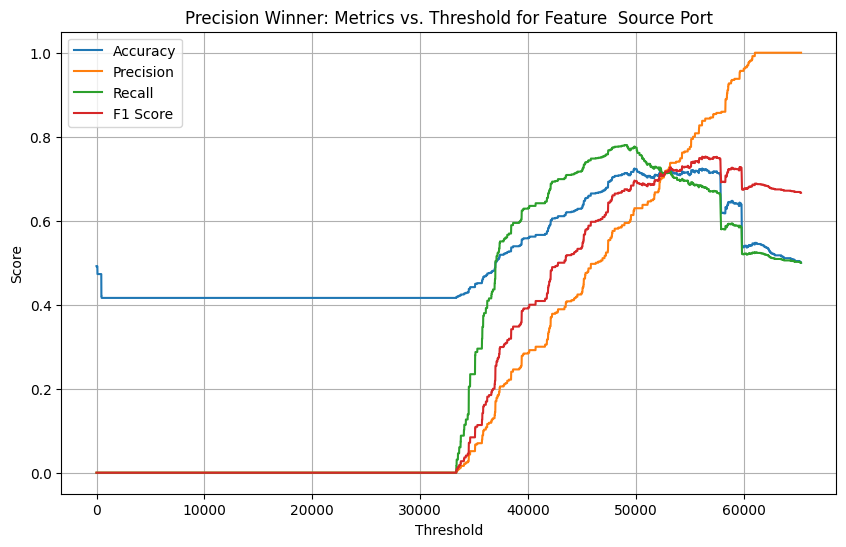

In [99]:
# Plot untuk Precision Winner
plot_metrics_for_winner(winner_precision, 'Precision')

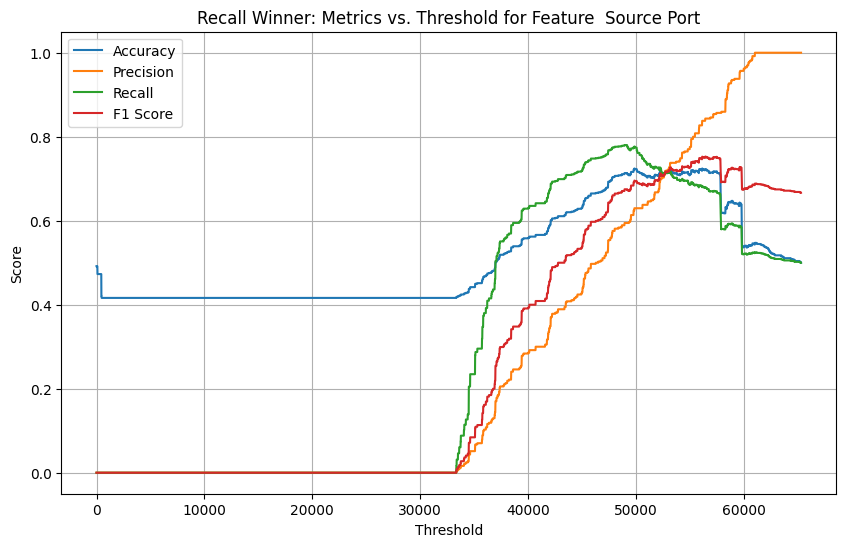

In [100]:
# Plot untuk Recall Winner
plot_metrics_for_winner(winner_recall, 'Recall')

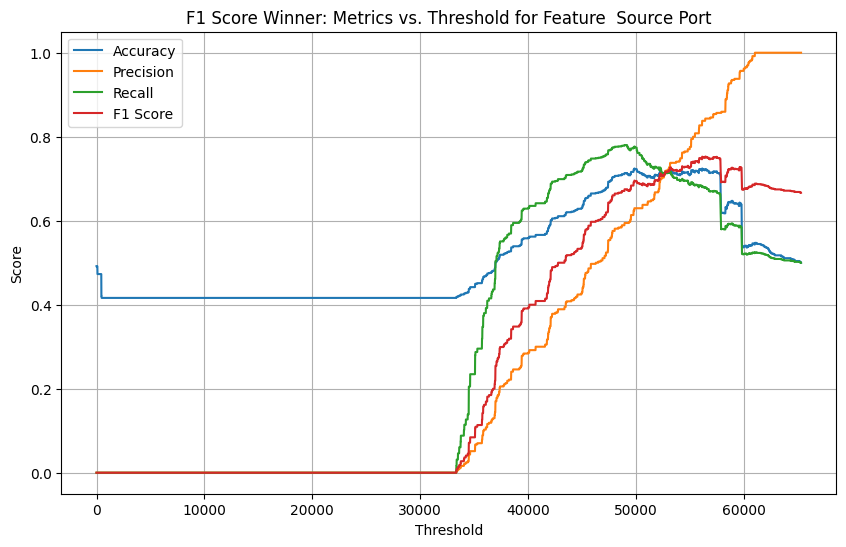

In [101]:
# Plot untuk F1-Score Winner
plot_metrics_for_winner(winner_f1_score, 'F1 Score')

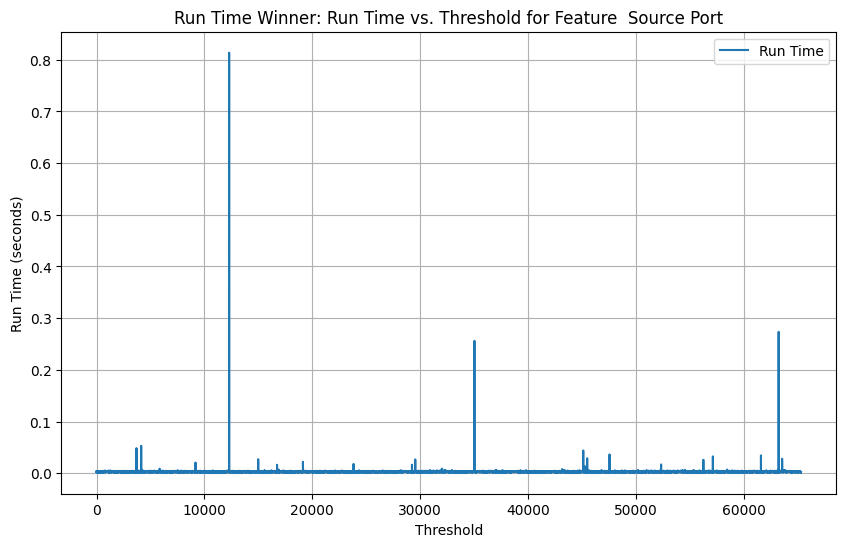

In [102]:
def plot_runtime_for_winner(winner):
    winner_feature, winner_threshold = winner[0]

    # Memfilter hasil threshold untuk fitur pemenang
    winner_results = [result for result in hasil_threshold if result[0][0] == winner_feature]

    # Pisahkan hasil menjadi list berdasarkan threshold dan run_time
    thresholds, run_time = [], []
    for result in winner_results:
        thresholds.append(result[0][1])
        run_time.append(result[5][0])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, run_time, label='Run Time')

    plt.title(f'Run Time Winner: Run Time vs. Threshold for Feature {winner_feature}')
    plt.xlabel('Threshold')
    plt.ylabel('Run Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot untuk Run Time Winner
plot_runtime_for_winner(winner_run_time)

In [103]:
# Output untuk setiap metrik
print(f"Precision terbaik dicapai dengan fitur {winner_precision[0][0]} dan threshold {winner_precision[0][1]}, menghasilkan precision {winner_precision[1][0]}.")
print(f"Recall terbaik dicapai dengan fitur {winner_recall[0][0]} dan threshold {winner_recall[0][1]}, menghasilkan recall {winner_recall[2][0]}.")
print(f"F1-score terbaik dicapai dengan fitur {winner_f1_score[0][0]} dan threshold {winner_f1_score[0][1]}, menghasilkan F1-score {winner_f1_score[3][0]}.")
print(f"Akurasi terbaik dicapai dengan fitur {winner_accuracy[0][0]} dan threshold {winner_accuracy[0][1]}, menghasilkan akurasi {winner_accuracy[4][0]}.")
print(f"Waktu running tercepat dicapai dengan fitur {winner_run_time[0][0]} dan threshold {winner_run_time[0][1]}, dengan waktu running {winner_run_time[5][0]} detik.")

Precision terbaik dicapai dengan fitur  Source Port dan threshold 60990, menghasilkan precision 1.0.
Recall terbaik dicapai dengan fitur  Source Port dan threshold 48913, menghasilkan recall 0.7801418439716312.
F1-score terbaik dicapai dengan fitur  Source Port dan threshold 56391, menghasilkan F1-score 0.752714113389626.
Akurasi terbaik dicapai dengan fitur  Source Port dan threshold 49825, menghasilkan akurasi 0.7243243243243244.
Waktu running tercepat dicapai dengan fitur  Source Port dan threshold 40544, dengan waktu running 0.0009984970092773438 detik.
